In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 5

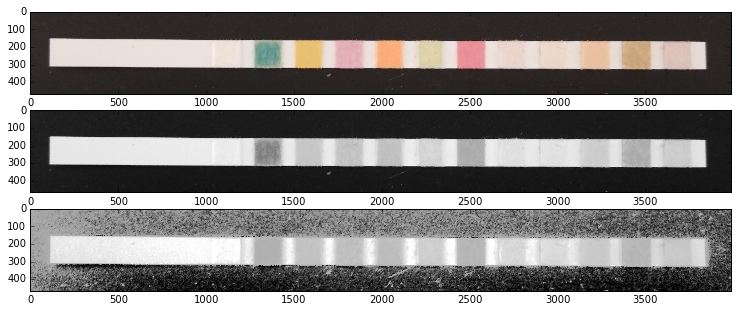

In [25]:
image_bgr = cv2.imread("../images/tests/4.JPG", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray_enh = cv2.equalizeHist(image_gray)
plt.subplot(3, 1, 1)
plt.imshow(image_rgb)
plt.subplot(3, 1, 2)
plt.imshow(image_gray, cmap='gray')
plt.subplot(3, 1, 3)
plt.imshow(image_gray_enh, cmap='gray')
plt.show()

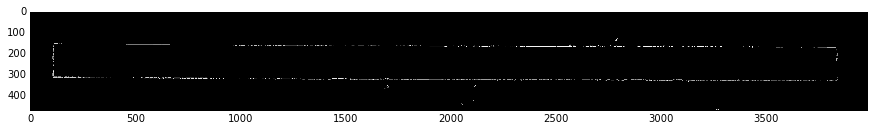

In [26]:
edges = cv2.Canny(image_gray, 50, 200, apertureSize=3, L2gradient=True)
plt.imshow(edges, cmap='gray')

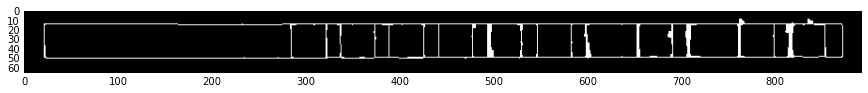

In [5]:
kernel = np.ones((7,7),np.uint8)
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
plt.imshow(edges_closed, cmap='gray')

In [6]:
_, contours, hierarchy = cv2.findContours(edges_closed.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
def get_max_area_contour_id(contours):
    max_area = 0.
    max_contour_id = -1
    for j, contour in enumerate(contours):
        new_area = cv2.contourArea(contour)
        if new_area > max_area:
            max_area = new_area
            max_contour_id = j
    return j

In [8]:
# TODO: научиться объединять все в один контур и фиксировать прямоугольник
def union_contours(contours, shape):
    tmp_img = np.zeros(shape)
    for j in xrange(len(contours)):
        cv2.drawContours(tmp_img, contours, j, 255, -1)
    return tmp_img.astype('uint8')

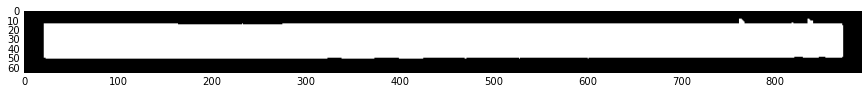

In [9]:
image_filled = union_contours(contours, image_gray_enh.shape)
plt.imshow(image_filled, cmap='gray')

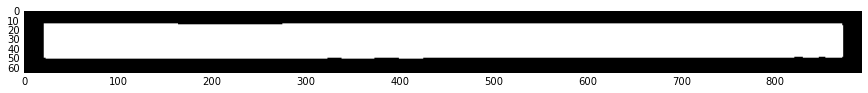

In [10]:
kernel = np.ones((7,7))
image_filled = cv2.morphologyEx(image_filled, cv2.MORPH_OPEN, kernel)
plt.imshow(image_filled, cmap='gray')

In [11]:
__, contours2, hierarchy2 = cv2.findContours(image_filled.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

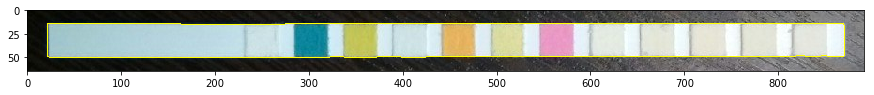

In [12]:
image_cont = image_rgb.copy()
cv2.drawContours(image_cont, contours2, 0, (255, 255, 0), 1)
plt.imshow(image_cont, cmap='gray')

In [13]:
brect = cv2.boundingRect(contours2[0])

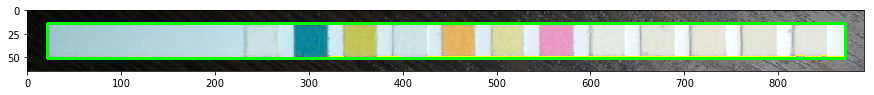

In [14]:
cv2.rectangle(image_cont, (brect[0], brect[1]), (brect[0] + brect[2], brect[1] + brect[3]), (0, 255, 0), 2)
plt.imshow(image_cont)

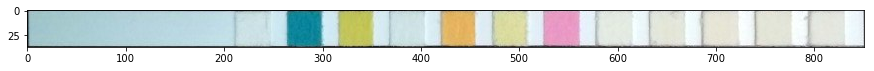

In [14]:
image_brect = image_rgb[brect[1] : brect[1] + brect[3], 
                        brect[0] : brect[0] + brect[2]]
plt.imshow(image_brect)

In [15]:
plt.imsave("../images/cropped.png", image_brect)

In [223]:
def get_boxes_r(image):
    a, b = image.shape[:2]
    k = a / 5. # scale coefficient, pixels / mm
#     print a, b, k
    
    boxes = [(int(b - 2.85 * k - k * (2.6 + 5) * j - 5 * k), 0,
              int(b - 2.85 * k - k * (2.6 + 5) * j), a)
              for j in xrange(12)]
    return boxes 

In [225]:
def get_boxes_l(image):
    a, b = image.shape[:2]
    k = a / 5. # scale coefficient, pixels / mm
    
    gap_width = 2.45
    pool_width = 5.0
    left_marg = 29.7
    
    boxes = [(int(k * (left_marg + (pool_width + gap_width) * j)), 0, 
              int(k * (left_marg + (pool_width + gap_width) * j + pool_width)), a) for j in xrange(12)]
    return boxes 

In [233]:
image_rgb = cv2.resize(image_brect, (25 * 24, 25))

In [234]:
boxes = get_boxes_l(image_rgb)

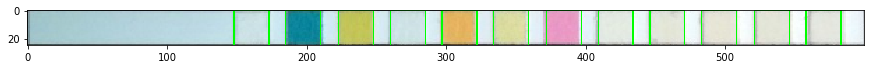

In [235]:
for x1,y1,x2,y2 in boxes:
    cv2.rectangle(image_rgb, (x1,y1), (x2,y2), (0, 255, 0), 1)
plt.imshow(image_rgb)

In [240]:
def get_reference_rect(image):
    
    a, b = image.shape[:2]
    k = a / 5. 
    
    gap_width = 2.45
    pool_width = 5.0
    left_marg = 29.7
    side_marg = 1.
    
    return np.array([int(side_marg * k), int(side_marg * k),
                     int((left_marg - side_marg) * k), int(a - side_marg * k)])

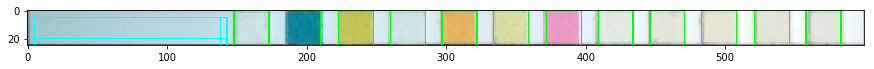

In [241]:
rect = get_reference_rect(image_rgb)
cv2.rectangle(image_rgb, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 255), 1)
plt.imshow(image_rgb)